In [1]:
#cargar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize) 

In [3]:
# xi = [1,16,31,46,51,71,101,116,131,151]
# xo = [15,30,45,50,70,100,115,130,150,200]

data1 = np.loadtxt('Datasets\BBDD_1_to_15.txt',delimiter=',')
data2 = np.loadtxt('Datasets\BBDD_16_to_30.txt',delimiter=',')
data3 = np.loadtxt('Datasets\BBDD_31_to_45.txt',delimiter=',')
data4 = np.loadtxt('Datasets\BBDD_46_to_50.txt',delimiter=',')
data5 = np.loadtxt('Datasets\BBDD_51_to_70.txt',delimiter=',')
data6 = np.loadtxt('Datasets\BBDD_71_to_100.txt',delimiter=',')
data7 = np.loadtxt('Datasets\BBDD_101_to_115.txt',delimiter=',')
data8 = np.loadtxt('Datasets\BBDD_116_to_130.txt',delimiter=',')
data9 = np.loadtxt('Datasets\BBDD_131_to_150.txt',delimiter=',')
data10 = np.loadtxt('Datasets\BBDD_151_to_200.txt',delimiter=',')

# Variables de entrada:
X1 = data1[:,:4]
X2 = data2[:,:4]
X3 = data3[:,:4]
X4 = data4[:,:4]
X5 = data5[:,:4]
X6 = data6[:,:4]
X7 = data7[:,:4]
X8 = data8[:,:4]
X9 = data9[:,:4]
X10 = data10[:,:4]

# Variables de salida:
Y1 = data1[:,4:101]
Y2 = data2[:,4:101]
Y3 = data3[:,4:101]
Y4 = data4[:,4:101]
Y5 = data5[:,4:101]
Y6 = data6[:,4:101]
Y7 = data7[:,4:101]
Y8 = data8[:,4:101]
Y9 = data9[:,4:101]
Y10 = data10[:,4:101]

# Se mezclan los datos::
X = np.vstack((X1,X2,X3,X4,X5,X6,X7,X8,X9,X10))
Y = np.vstack((Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10))

In [4]:
Y

array([[297.95  , 297.9666, 297.9823, 297.9973, 298.0117, 298.0255,
        298.0386, 298.0514, 298.0638, 298.0757, 298.0872, 298.0982,
        298.1087, 298.1192, 298.1294, 298.1394, 298.149 , 298.1584,
        298.1674, 298.1761, 298.1845, 298.1926, 298.2005, 298.2086,
        298.2164, 298.2241, 298.2316, 298.2389, 298.2459, 298.2528,
        298.2595, 298.266 , 298.2724, 298.2789, 298.2853, 298.2916,
        298.2977, 298.3037, 298.3096, 298.3154, 298.321 , 298.3265,
        298.3321, 298.3375, 298.3429, 298.3482, 298.3535, 298.3586,
        298.3636, 298.3686, 298.3734, 298.3782, 298.383 , 298.3877,
        298.3924, 298.397 , 298.4015, 298.4059, 298.4103, 298.4146,
        298.4188, 298.423 , 298.4272, 298.4313, 298.4354, 298.4394,
        298.4433, 298.4472, 298.4511, 298.4549, 298.4586, 298.4623,
        298.466 , 298.4697, 298.4733, 298.4769, 298.4804, 298.4839,
        298.4873, 298.4907, 298.4941, 298.4974, 298.5007, 298.504 ,
        298.5073, 298.5105, 298.5136, 298.5168, 

In [5]:
X

array([[3.4895401e+03, 1.0463401e+03, 6.2910000e-01, 9.3793000e+00],
       [4.7428535e+03, 9.1367920e+02, 6.2800000e-01, 3.0611000e+00],
       [3.6586178e+03, 8.9181680e+02, 6.8340000e-01, 8.0293200e+01],
       [3.2262058e+03, 1.0207265e+03, 5.2060000e-01, 4.3757000e+01],
       [3.7287935e+03, 1.0019316e+03, 6.7400000e-01, 5.3287100e+01],
       [4.3077146e+03, 7.8004290e+02, 5.8870000e-01, 6.9276700e+01],
       [4.7106690e+03, 1.0704687e+03, 6.2660000e-01, 4.5450500e+01],
       [4.3082453e+03, 8.9071200e+02, 5.4520000e-01, 4.0006500e+01],
       [4.3059791e+03, 9.9227660e+02, 6.8640000e-01, 8.9907700e+01],
       [4.7662210e+03, 8.4190260e+02, 5.9740000e-01, 1.5051700e+01],
       [4.7095709e+03, 9.9306720e+02, 5.4980000e-01, 1.6014600e+01],
       [4.2956634e+03, 9.1225960e+02, 6.0480000e-01, 2.8302300e+01],
       [4.5073296e+03, 9.9184840e+02, 5.1850000e-01, 5.2115000e+00],
       [4.6809629e+03, 1.0064602e+03, 6.1930000e-01, 7.5695000e+01],
       [4.1548376e+03, 8.7872390e+

In [6]:
print(X.shape)
print(Y.shape)

(200, 4)
(200, 97)


In [7]:
k_range = X[:,3]
k_range

array([ 9.3793,  3.0611, 80.2932, 43.757 , 53.2871, 69.2767, 45.4505,
       40.0065, 89.9077, 15.0517, 16.0146, 28.3023,  5.2115, 75.695 ,
       60.4688, 81.9793, 43.9074, 87.627 , 32.7738, 78.1844, 23.1839,
       86.8117, 14.6126, 77.8335, 82.5537, 51.9802, 83.6959, 16.6513,
       10.785 , 86.2553, 33.481 , 62.3004, 89.2466, 86.6594, 46.1277,
       89.2984, 66.5873, 44.6295, 60.8239, 51.5445, 23.6204, 39.5631,
       55.8906, 74.6651, 55.5748,  3.4163, 57.3981, 81.2049, 70.8455,
       11.4847, 10.43  , 27.7404, 42.8871,  8.3752,  9.4675, 57.4823,
       60.8071, 81.4056, 28.637 , 14.9019, 62.7743, 32.8503, 73.0033,
       71.4379, 72.4156, 79.0425, 20.3746, 58.3128, 44.7479, 28.4465,
        2.0843, 66.5314, 77.7843, 28.2601, 87.5582, 70.873 , 40.6489,
       88.9672, 67.9877, 80.884 , 53.2675, 77.222 , 74.3874, 79.8797,
       18.7808, 64.7061, 56.711 ,  6.7398, 86.8749, 65.1168, 24.5211,
       25.7124, 17.428 , 19.8059, 26.166 , 41.9873, 47.0881, 64.1552,
       65.6329, 10.1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print('x train:\n', x_train)
print('y train: \n',y_train)
print('x test: \n',x_test)
print('y test: \n',y_test)

x train:
 [[3.7201712e+03 9.5190890e+02 7.2090000e-01 7.0597000e+01]
 [3.6763116e+03 1.0588762e+03 5.9650000e-01 5.2172700e+01]
 [4.4004629e+03 9.1562400e+02 6.7800000e-01 6.1254700e+01]
 [3.3372503e+03 1.0708789e+03 6.1980000e-01 4.4629500e+01]
 [4.2702091e+03 9.8974090e+02 6.7810000e-01 1.8780800e+01]
 [3.7332029e+03 9.2255510e+02 6.8000000e-01 1.7904200e+01]
 [4.6350276e+03 9.6704320e+02 5.0500000e-01 5.4755400e+01]
 [3.8227865e+03 9.6795860e+02 6.0390000e-01 9.4675000e+00]
 [3.9253303e+03 1.1701062e+03 5.9180000e-01 3.9563100e+01]
 [4.5460447e+03 8.5421280e+02 6.7010000e-01 4.3993300e+01]
 [4.5029265e+03 9.9495640e+02 5.8410000e-01 7.0873000e+01]
 [4.1905485e+03 8.0277780e+02 5.2370000e-01 3.5201800e+01]
 [4.1263065e+03 1.1814779e+03 5.0890000e-01 1.8884600e+01]
 [4.0271170e+03 1.1441343e+03 5.8660000e-01 4.1755900e+01]
 [4.6743509e+03 1.0846056e+03 5.7880000e-01 2.1803800e+01]
 [3.6725410e+03 9.0866240e+02 7.2710000e-01 6.3853900e+01]
 [4.4148130e+03 9.1904750e+02 6.1660000e-01 6.

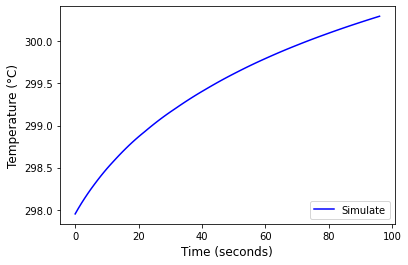

In [9]:
#plt.plot(y_test[1,:])
plt.plot(y_test[1,:],"b",label = "Simulate")
plt.legend(loc = "lower right")
#plt.title("Linear Regression Model", fontsize=14) 
plt.xlabel("Time (seconds)", fontsize=12) 
plt.ylabel("Temperature (°C)", fontsize=12)
#plt.show()
plt.savefig('graficasimulate.png',bbox_inches='tight')

In [10]:
model = LinearRegression()

El coeficiente de determinación R2 determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

El rango de R2 está entre 0 y 1, siendo 1 lo mejor. Para medir el coeficiente de determinación R2 de la regresión lineal usaremos el método score.

score(X,y): Devuelve el coeficiente de determinación R2 de la predicción.

In [11]:
#train 
start = time.time() # Iniciar medida del tiempo
model.fit(x_train,y_train)
score_train = model.score(x_train, y_train);score_train
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')
print('Score train: %f' % score_train,"\n")

Tiempo total entrenamiento: 0.06660580635070801 segundos
Score train: 0.989194 



In [12]:
#test
start = time.time() # Iniciar medida del tiempo
y_pred = model.predict(x_test)
score_test = model.score(x_test, y_test)
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
print('Score test: %f' % score_test,"\n")
y_pred

Tiempo total validación: 0.001997232437133789 segundos
Score test: 0.991833 



array([[297.95021484, 298.06518624, 298.17161493, 298.27117826,
        298.36571493, 298.45509323, 298.53916966, 298.62073472,
        298.69903789, 298.77370613, 298.8447351 , 298.91216064,
        298.97594156, 299.03961207, 299.10226965, 299.16274188,
        299.22100846, 299.27708677, 299.33095123, 299.38263112,
        299.4321261 , 299.47939838, 299.52500282, 299.5728577 ,
        299.6194142 , 299.66471277, 299.70873087, 299.75144878,
        299.79289911, 299.83306381, 299.87196412, 299.90955836,
        299.94724954, 299.98537935, 300.02274894, 300.0593621 ,
        300.09522356, 300.13034847, 300.1647139 , 300.19832988,
        300.2311777 , 300.26329869, 300.29564653, 300.32755794,
        300.35889925, 300.38971295, 300.4199857 , 300.44970478,
        300.47888247, 300.5075234 , 300.535614  , 300.56332859,
        300.59091451, 300.61805005, 300.64476907, 300.67103422,
        300.69685349, 300.72224403, 300.74719442, 300.77169569,
        300.79575746, 300.81973841, 300.

In [13]:
y_test

array([[297.9502, 298.0701, 298.1807, 298.2838, 298.3813, 298.4732,
        298.5594, 298.6428, 298.7228, 298.7989, 298.8711, 298.9394,
        299.0038, 299.0682, 299.1317, 299.1928, 299.2517, 299.3082,
        299.3625, 299.4144, 299.4641, 299.5114, 299.557 , 299.6051,
        299.6519, 299.6974, 299.7416, 299.7844, 299.826 , 299.8662,
        299.9051, 299.9427, 299.9804, 300.0186, 300.056 , 300.0926,
        300.1285, 300.1636, 300.1979, 300.2315, 300.2643, 300.2964,
        300.3286, 300.3604, 300.3917, 300.4224, 300.4525, 300.482 ,
        300.511 , 300.5395, 300.5674, 300.5949, 300.6222, 300.6492,
        300.6757, 300.7017, 300.7273, 300.7525, 300.7771, 300.8014,
        300.8252, 300.8489, 300.8725, 300.8956, 300.9185, 300.941 ,
        300.9631, 300.9849, 301.0064, 301.0275, 301.0483, 301.0692,
        301.0898, 301.1102, 301.1303, 301.1501, 301.1697, 301.1891,
        301.2082, 301.227 , 301.2457, 301.2643, 301.2828, 301.301 ,
        301.319 , 301.3369, 301.3545, 301.3719, 

In [14]:
print(y_test.shape)

(40, 97)


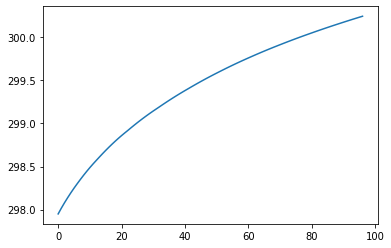

In [15]:
plt.plot(y_pred[1,:])

In [16]:
coeficientes = model.coef_
print(coeficientes)
print(coeficientes.shape)

[[-3.21457167e-08 -1.62815937e-07  3.29831593e-05  3.05746212e-06]
 [-1.88688083e-05 -8.32834444e-05  1.32751448e-03  1.55883528e-03]
 [-3.56965387e-05 -1.57058109e-04 -3.35372998e-03  3.00610291e-03]
 [-5.09151292e-05 -2.23516617e-04 -1.25387208e-02  4.36860710e-03]
 [-6.49817294e-05 -2.84765544e-04 -2.47363134e-02  5.67004167e-03]
 [-7.78676206e-05 -3.40642375e-04 -3.98592759e-02  6.90832587e-03]
 [-8.95231515e-05 -3.91046839e-04 -5.83311263e-02  8.08236569e-03]
 [-1.00690873e-04 -4.39323144e-04 -7.74452494e-02  9.22393773e-03]
 [-1.11199738e-04 -4.84548139e-04 -9.79937927e-02  1.03242926e-02]
 [-1.20926354e-04 -5.26320993e-04 -1.20294938e-01  1.13793201e-02]
 [-1.29864711e-04 -5.64511815e-04 -1.44344797e-01  1.23893708e-02]
 [-1.38048641e-04 -5.99383628e-04 -1.70040346e-01  1.33536335e-02]
 [-1.45444728e-04 -6.30732927e-04 -1.97461611e-01  1.42728562e-02]
 [-1.52973547e-04 -6.62629183e-04 -2.23599492e-01  1.51877513e-02]
 [-1.60385312e-04 -6.94083163e-04 -2.49308340e-01  1.60885054e

In [17]:
print(model.intercept_)
print(model.intercept_.shape)

[297.95026843 298.11189627 298.26008464 298.39731882 298.52650318
 298.64732216 298.75972719 298.86837914 298.9721566  299.07035907
 299.16281593 299.24990335 299.33128505 299.41290081 299.49325425
 299.57052145 299.64440881 299.71527342 299.78276159 299.8472165
 299.90829236 299.96609606 300.0216764  300.08056001 300.13779401
 300.19311706 300.2466841  300.2983628  300.34826011 300.3964233
 300.44256306 300.48696192 300.53149689 300.57649103 300.62045468
 300.66331548 300.70513132 300.74572901 300.78529476 300.82387094
 300.86126335 300.89756935 300.93420945 300.97036196 301.00559864
 301.040178   301.07393375 301.10686391 301.13911348 301.17047879
 301.20110706 301.23129747 301.26164498 301.29115532 301.32032472
 301.34880645 301.37687248 301.40421024 301.43090981 301.4571097
 301.48286634 301.50849427 301.53402121 301.55902126 301.58367184
 301.60793033 301.63177227 301.65515388 301.67810024 301.70074673
 301.72299042 301.74534258 301.76727505 301.78902742 301.81044517
 301.83142506

In [18]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

MSE:  0.0069111817967212625


In [19]:
e1 = y_pred[1,:] - y_test[1,:]
e1

array([ 2.49735390e-05,  1.32128431e-03,  2.03609932e-03,  2.35423038e-03,
        2.55850982e-03,  2.58219219e-03,  2.36847280e-03,  2.06619898e-03,
        1.68537285e-03,  1.26985461e-03,  6.13877357e-04, -6.97568174e-05,
       -8.98370996e-04, -1.63964641e-03, -2.32660117e-03, -3.05839568e-03,
       -3.80979247e-03, -4.70289096e-03, -5.52597748e-03, -6.38703967e-03,
       -7.27406452e-03, -8.19459907e-03, -9.10394619e-03, -9.98104069e-03,
       -1.07423323e-02, -1.15495476e-02, -1.24063181e-02, -1.32268343e-02,
       -1.39994857e-02, -1.48194664e-02, -1.55982071e-02, -1.64349634e-02,
       -1.71546090e-02, -1.79589872e-02, -1.86261944e-02, -1.93582059e-02,
       -2.00490242e-02, -2.07794813e-02, -2.14822624e-02, -2.21383941e-02,
       -2.28566104e-02, -2.34113684e-02, -2.41403291e-02, -2.47425015e-02,
       -2.53889394e-02, -2.60633976e-02, -2.66673130e-02, -2.73026338e-02,
       -2.78768105e-02, -2.84751845e-02, -2.91112925e-02, -2.96795779e-02,
       -3.02533741e-02, -

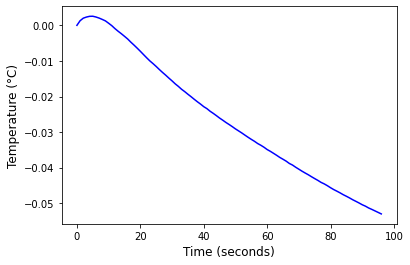

In [20]:
plt.plot(e1,"b")
plt.xlabel("Time (seconds)", fontsize=12) 
plt.ylabel("Temperature (°C)", fontsize=12)
plt.savefig('error.png',bbox_inches='tight')

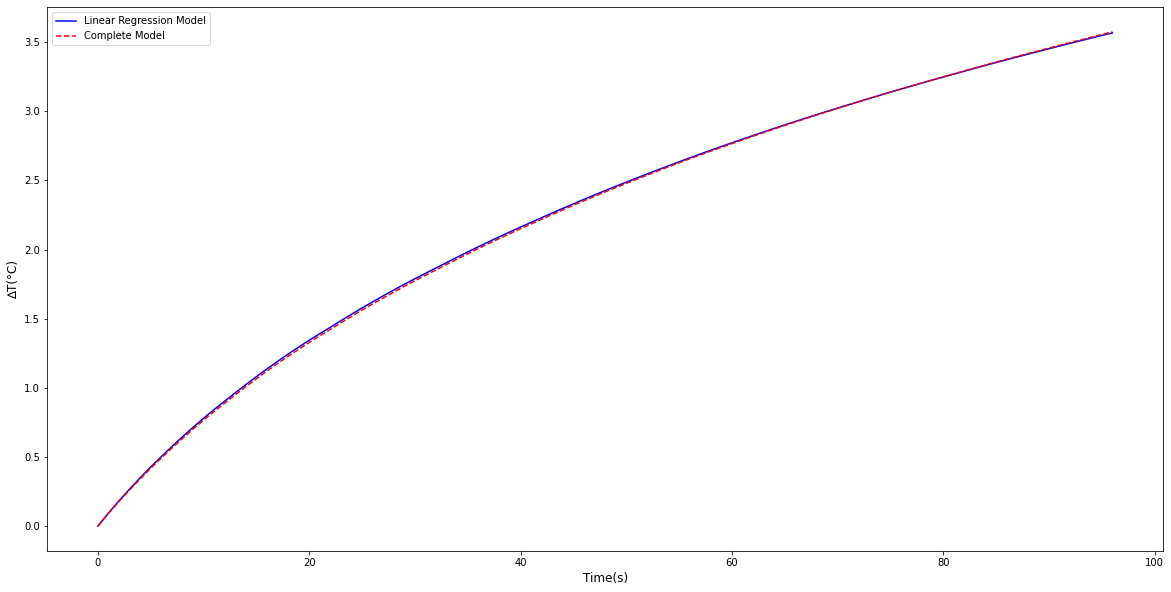

In [26]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))

plt.plot(y_pred[26,:] - 297.95,"b",label = "Linear Regression Model")
plt.plot(y_test[26,:] - 297.95,"r--",label = "Complete Model")
plt.legend(loc = "lower right")
#plt.title("Modelo de regresión lineal", fontsize=14) 

plt.legend(loc = "best")
#plt.title("Modelo de regresión lineal", fontsize=14) 
plt.xlabel("Time(s)", fontsize=12) 
plt.ylabel("∆T(°C)", fontsize=12)
#plt.show()
plt.savefig('predvssimulate.png',bbox_inches='tight')

In [28]:
e = y_pred - y_test;e

array([[-2.32876415e-05,  9.95624269e-03,  1.84703959e-02,
         2.59350825e-02,  3.26887101e-02,  3.84610048e-02,
         4.35063289e-02,  4.82557392e-02,  5.26897622e-02,
         5.65180324e-02,  5.98409183e-02,  6.27189628e-02,
         6.49763688e-02,  6.75944135e-02,  7.00391424e-02,
         7.23432891e-02,  7.44685023e-02,  7.63389577e-02,
         7.79202987e-02,  7.93588289e-02,  8.05270475e-02,
         8.14155665e-02,  8.22687285e-02,  8.34480769e-02,
         8.45275580e-02,  8.55427369e-02,  8.64698655e-02,
         8.72718906e-02,  8.79956347e-02,  8.86293730e-02,
         8.91765807e-02,  8.96067350e-02,  8.99769347e-02,
         9.05167866e-02,  9.09467708e-02,  9.12809468e-02,
         9.16269755e-02,  9.18830168e-02,  9.20449184e-02,
         9.22142658e-02,  9.22883940e-02,  9.23680850e-02,
         9.24594346e-02,  9.24808006e-02,  9.24866872e-02,
         9.23782543e-02,  9.22657512e-02,  9.21445801e-02,
         9.20042532e-02,  9.17634292e-02,  9.15063730e-0

In [29]:
# Exportar el modelo en un archivo aparte:
import joblib
joblib.dump(model, "model_RL_26-09-2021.pkl")

['model_RL_26-09-2021.pkl']

In [29]:
from joblib import dump, load
dump(model, 'model_RL_26-09-2021.joblib') 

['model_RL_07-09-2021.joblib']

SE CARGA EL MODELO ENTRENADO Y SE VUELVE A EVALUAR CON NUEVOS DATOS QUE EL MODELO NO CONOCE, PERO QUE DE LOS CUALES YA SE SIMULARON Y SE SABE EL VALOR DE LA SALIDA REAL

In [55]:
from joblib import dump, load

#RL_model = load('model_RL_27-06-2021.joblib') ---> MEJOR MODELO ENTRENADO HASTA AHORA
RL_model = load('model_RL_07-09-2021.joblib') 

In [56]:
new_data1 = np.loadtxt('Datasets\BBDD_Extra_1_to_25.txt',delimiter=',')
new_data2 = np.loadtxt('Datasets\BBDD_Extra_26_to_50.txt',delimiter=',')

In [57]:
# Variables de entrada:
new_X1 = new_data1[:,:4]
new_X2 = new_data2[:,:4]

# Variables de salida:
new_Y1 = new_data1[:,4:101]
new_Y2 = new_data2[:,4:101]

# Se mezclan los datos::
new_X = np.vstack((new_X1,new_X2))
new_Y = np.vstack((new_Y1,new_Y2))

In [58]:
#test
start = time.time() # Iniciar medida del tiempo
y_pred_new = RL_model.predict(new_X)
score_test_new = RL_model.score(new_X, new_Y) # Probar el score con: y_pred_new (100%) y new_Y
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
print('Score test: %f' % score_test_new,"\n")
y_pred_new

Tiempo total validación: 0.037811994552612305 segundos
Score test: 0.990382 



array([[297.95026047, 298.08771893, 298.21557448, 298.33575445,
        298.45031612, 298.55909782, 298.66197864, 298.76194251,
        298.85818242, 298.95030418, 299.03830807, 299.12220265,
        299.20197553, 299.28145839, 299.35970663, 299.43540193,
        299.50854404, 299.57913065, 299.64717771, 299.71264978,
        299.77559819, 299.83597351, 299.8943751 , 299.95521974,
        300.01453126, 300.07232464, 300.12859553, 300.18333135,
        300.2365596 , 300.28824986, 300.33842726, 300.38706955,
        300.43579012, 300.48496617, 300.53324777, 300.58060504,
        300.62706295, 300.67262047, 300.71725891, 300.76099601,
        300.80381182, 300.84574165, 300.88792659, 300.92957028,
        300.97053683, 301.01084446, 301.05050146, 301.08948677,
        301.12781263, 301.16548305, 301.20249164, 301.23901728,
        301.2753497 , 301.31114633, 301.34640848, 301.38111879,
        301.41527884, 301.44891108, 301.48199073, 301.51451858,
        301.54650483, 301.57835724, 301.

In [59]:
print(y_pred_new.shape)
print(new_Y.shape)

(50, 97)
(50, 97)


In [60]:
new_mse = mean_squared_error(new_Y, y_pred_new, squared = False)
print("MSE: ",new_mse)

MSE:  0.08222573555951518


In [61]:
new_Y

array([[297.9503, 298.0911, 298.2216, 298.344 , 298.4604, 298.5708,
        298.6749, 298.776 , 298.8732, 298.966 , 299.0545, 299.1387,
        299.2185, 299.2981, 299.3766, 299.4524, 299.5256, 299.5962,
        299.6642, 299.7295, 299.7922, 299.8522, 299.9103, 299.9709,
        300.03  , 300.0876, 300.1436, 300.1981, 300.251 , 300.3023,
        300.3522, 300.4004, 300.4488, 300.4976, 300.5455, 300.5924,
        300.6385, 300.6836, 300.7278, 300.771 , 300.8134, 300.8548,
        300.8965, 300.9376, 300.9781, 301.0179, 301.057 , 301.0954,
        301.1332, 301.1702, 301.2067, 301.2426, 301.2784, 301.3136,
        301.3483, 301.3825, 301.4161, 301.4491, 301.4816, 301.5136,
        301.545 , 301.5763, 301.6073, 301.6379, 301.6681, 301.6978,
        301.7271, 301.7559, 301.7844, 301.8124, 301.84  , 301.8677,
        301.895 , 301.922 , 301.9487, 301.9751, 302.0011, 302.0268,
        302.0522, 302.0772, 302.1021, 302.1269, 302.1514, 302.1757,
        302.1997, 302.2235, 302.247 , 302.2702, 

El vector de y_pred graficado es:  29


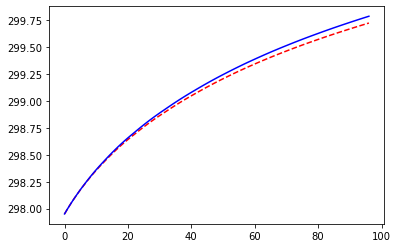

In [62]:
# Sirve para graficar aleatoriamente unos de los vectores T° de salida predichos:
import random
random_num = random.randrange(1, 50, 1)
random_num

plt.plot(y_pred_new[random_num,:],"r--",new_Y[random_num,:],"b")
print("El vector de y_pred graficado es: ", random_num)

In [63]:
import random
row_random_num = random.randrange(1, 40, 1)
column_random_num = random.randrange(1, 97, 1)

print("Fila: ", row_random_num)
print("Columna: ", column_random_num,"\n")

print(y_test[row_random_num,column_random_num])
print(y_pred[row_random_num,column_random_num])

Fila:  31
Columna:  68 

302.6063
302.43779937393856


ANÁLISIS DE SENSIBILIDAD

In [64]:
import numpy as np
cp = 4184.1
p = 998.20
k = 0.6034
mi_h2o = 29.4

values_exacts=[cp, p, k, mi_h2o]
values_exactst=np.array(values_exacts)
#vec_exact.reshape(-1,1)
print(values_exacts)
print(x_test[1,:])

[4184.1, 998.2, 0.6034, 29.4]
[4.794485e+03 9.569893e+02 5.125000e-01 3.333490e+01]


In [65]:
a = np.zeros((9, 4))
x_senb = np.empty_like(a)
x_senb[0] = values_exacts
x_senb[1] = [cp+cp*0.1, p, k, mi_h2o] #Tcp(+)
x_senb[2] = [cp-cp*0.1, p, k, mi_h2o] #Tcp(-)
x_senb[3] = [cp, p+p*0.1, k, mi_h2o] #Tp(+)
x_senb[4] = [cp, p-p*0.1, k, mi_h2o] #Tp(-)
x_senb[5] = [cp, p, k+k*0.1, mi_h2o] #Tk(+)
x_senb[6] = [cp, p, k-k*0.1, mi_h2o] #Tk(-)
x_senb[7] = [cp, p, k, mi_h2o+mi_h2o*0.1] #Tmi_h2o(+)
x_senb[8] = [cp, p, k, mi_h2o-mi_h2o*0.1] #Tmi_h2o(-)
x_senb

array([[4.18410e+03, 9.98200e+02, 6.03400e-01, 2.94000e+01],
       [4.60251e+03, 9.98200e+02, 6.03400e-01, 2.94000e+01],
       [3.76569e+03, 9.98200e+02, 6.03400e-01, 2.94000e+01],
       [4.18410e+03, 1.09802e+03, 6.03400e-01, 2.94000e+01],
       [4.18410e+03, 8.98380e+02, 6.03400e-01, 2.94000e+01],
       [4.18410e+03, 9.98200e+02, 6.63740e-01, 2.94000e+01],
       [4.18410e+03, 9.98200e+02, 5.43060e-01, 2.94000e+01],
       [4.18410e+03, 9.98200e+02, 6.03400e-01, 3.23400e+01],
       [4.18410e+03, 9.98200e+02, 6.03400e-01, 2.64600e+01]])

In [66]:
#test exact
start = time.time() # Iniciar medida del tiempo
y_pred_exact = model.predict(x_senb)
#score_test = model.score(x_test, y_test)
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
#print('Score test: %f' % score_test,"\n")
y_pred_exact

Tiempo total validación: 0.0 segundos


array([[297.95008143, 297.99645975, 298.04035318, 298.0821141 ,
        298.12223996, 298.16068112, 298.19741182, 298.23320953,
        298.26786169, 298.30126191, 298.33341399, 298.36433136,
        298.39398916, 298.42342167, 298.4523637 , 298.4804709 ,
        298.50775279, 298.53420764, 298.55981209, 298.58460035,
        298.60854542, 298.63166404, 298.65411279, 298.6771766 ,
        298.69969983, 298.72169423, 298.74315572, 298.76407279,
        298.78446238, 298.8043136 , 298.82362943, 298.84241134,
        298.86117149, 298.88003203, 298.89855413, 298.91674158,
        298.93458987, 298.95210268, 298.96927395, 298.98611062,
        299.00261098, 299.01877226, 299.03503724, 299.0511009 ,
        299.06691657, 299.08248439, 299.09780799, 299.11288925,
        299.1277192 , 299.14230603, 299.1566496 , 299.170819  ,
        299.18493884, 299.19886565, 299.21259233, 299.22611233,
        299.23944645, 299.25257589, 299.26551371, 299.27825243,
        299.29079311, 299.30327466, 299.

In [67]:
Jcp = (y_pred_exact[1] - y_pred_exact[2]) / (2*0.1*cp)
Jp = (y_pred_exact[3] - y_pred_exact[4]) / (2*0.1*p)
Jk = (y_pred_exact[5] - y_pred_exact[6]) / (2*0.1*k)
Jmi_h2o = (y_pred_exact[7] - y_pred_exact[8]) / (2*0.1*mi_h2o)
Jcp
#reducisdos
Jcpr = cp*(y_pred_exact[1] - y_pred_exact[2]) / (2*0.1*cp)
Jpr = p*(y_pred_exact[3] - y_pred_exact[4]) / (2*0.1*p)
Jkr = k*(y_pred_exact[5] - y_pred_exact[6]) / (2*0.1*k)
Jmi_h2or = mi_h2o*(y_pred_exact[7] - y_pred_exact[8]) / (2*0.1*mi_h2o)
Jcpr

array([-1.49363644e-04, -8.04821346e-02, -1.52139256e-01, -2.16796886e-01,
       -2.76485497e-01, -3.31040408e-01, -3.80336682e-01, -4.27563512e-01,
       -4.71922022e-01, -5.12973875e-01, -5.50619234e-01, -5.85017220e-01,
       -6.16006038e-01, -6.47671511e-01, -6.78812997e-01, -7.08286222e-01,
       -7.35959075e-01, -7.61904224e-01, -7.86018150e-01, -8.08511895e-01,
       -8.29226850e-01, -8.48110684e-01, -8.65882347e-01, -8.85954814e-01,
       -9.05255693e-01, -9.23711439e-01, -9.41294872e-01, -9.57949964e-01,
       -9.73752333e-01, -9.88677034e-01, -1.00275671e+00, -1.01587642e+00,
       -1.02925111e+00, -1.04308445e+00, -1.05639308e+00, -1.06926827e+00,
       -1.08163106e+00, -1.09354600e+00, -1.10502904e+00, -1.11601901e+00,
       -1.12653903e+00, -1.13658140e+00, -1.14682535e+00, -1.15680177e+00,
       -1.16647747e+00, -1.17578166e+00, -1.18482038e+00, -1.19344471e+00,
       -1.20178789e+00, -1.20978880e+00, -1.21746080e+00, -1.22494044e+00,
       -1.23252408e+00, -

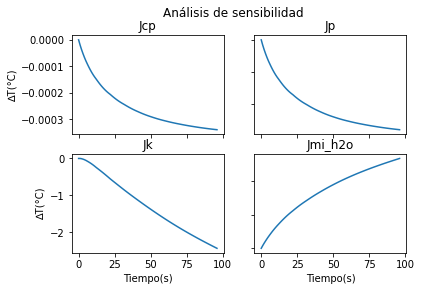

In [68]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(Jcp)
axs[0, 0].set_title('Jcp')
axs[0, 1].plot(Jp) #plot(Jp, 'tab:orange')
axs[0, 1].set_title('Jp')
axs[1, 0].plot(Jk)
axs[1, 0].set_title('Jk')
axs[1, 1].plot(Jmi_h2o)
axs[1, 1].set_title('Jmi_h2o')

fig.suptitle('Análisis de sensibilidad')

for ax in axs.flat:
    ax.set(xlabel='Tiempo(s)', ylabel='∆T(°C)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('analisisenb.png',bbox_inches='tight')

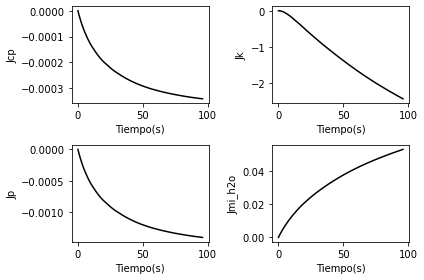

In [69]:

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(Jcp,'k')
#axs[0, 0].set_title("Jcp")
axs[0, 0].set(xlabel='Tiempo(s)',ylabel='Jcp')
axs[1, 0].plot(Jp,'k')
#axs[1, 0].set_title("Jp")
axs[1, 0].set(xlabel='Tiempo(s)',ylabel='Jp')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(Jk,'k')
axs[0, 1].set(xlabel='Tiempo(s)',ylabel='Jk')
#axs[0, 1].set_title("Jk")
axs[1, 1].plot(Jmi_h2o,'k')
#axs[1, 1].set_title("Jmi_H2O")
axs[1, 1].set(xlabel='Tiempo(s)',ylabel='Jmi_h2o')
              

fig.tight_layout()

#fig.suptitle('Análisis de sensibilidad')

# for ax in axs.flat:
#     ax.set(xlabel='Tiempo(s)\n', ylabel='∆T(°C)\n')

plt.savefig('analisisenb_2daImagen.png',bbox_inches='tight')

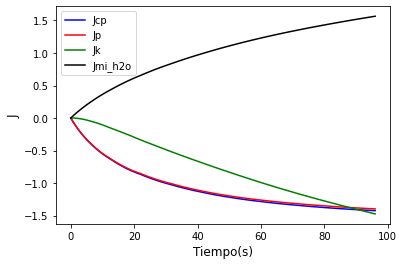

In [70]:
#fig, ax = plt.subplots()
plt.plot(Jcpr,"b",label = "Jcp")
plt.plot(Jpr,"r",label = "Jp")
plt.plot(Jkr,"g",label = "Jk")
plt.plot(Jmi_h2or,"k",label = "Jmi_h2o")
plt.legend(loc = "best")
#plt.title("Modelo de regresión lineal", fontsize=14) 
plt.xlabel("Tiempo(s)", fontsize=12) 
plt.ylabel("J", fontsize=12)
#plt.show()
plt.savefig('Js.png',bbox_inches='tight')

In [71]:
TpSimCompleto = (1615.749100 + 1549.457378 + 2075.216943) / 3 ; 
print(TpSimCompleto, 'segundos')
print(TpSimCompleto/60, 'minutos')

1746.807807 segundos
29.113463449999998 minutos
